# Handwritten Digits Recognition

In [1]:
# Importing all required libraries.

import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization,ZeroPadding2D
from tensorflow.keras.optimizers import SGD,Adam
from keras.optimizers import RMSprop
from sklearn.metrics import classification_report
from keras import callbacks
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch

## Overview of the dataset

The dataset source is http://yann.lecun.com/exdb/mnist/ .

The dataset has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

## Procedures for 2D convolutional neural network image categorization.

1. Imported all necessary libraries which are as follows: tensorflow, SGD, numpy, classification_report etc.
2. The dataset were loaded.
3. Preprocess the data. In this step, the image dataset is transformed using techniques like rotation, shift, and flipping, among others.
4. Built the model. In Keras, a Sequential model is a linear stack of layers, and layers can be added by using the add() method. The first layer in the model specifies the input shape.
5. Compiled the model. This step involves specifying the loss function, the optimizer, and any metrics that can be tracked during training.
6. Trained the model. Used the fit() method to train the model on the training data. The validation data can also be specified at this step.
7. Evaluated the model. The evaluate() method was used to evaluate the model on the test data. This would provide the accuracy and other metrics that were specified earlier.
8. Predictions: Used the predict() method to make predictions on new data.
9. Visualised the results: Used tools like Confusion matrix, classification report, Matplotlib to visualize the results.

### Step 1: Import all necessary libraries.

All relevant libraries have been imported at the begining of this Jupyter workbook.

### Step 2: Load the dataset.


The x_train and y_train variables contain the 60,000 training images and their corresponding labels, 
while x_test and y_test contain the 10,000 test images and their labels.


mnist.load_data() function splits the  MNIST dataset into 60,000 training images and 10,000 test images. 
The load_data() function will return two tuples  one containing the training data and  the other, test data.

In [2]:
# Load the  MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

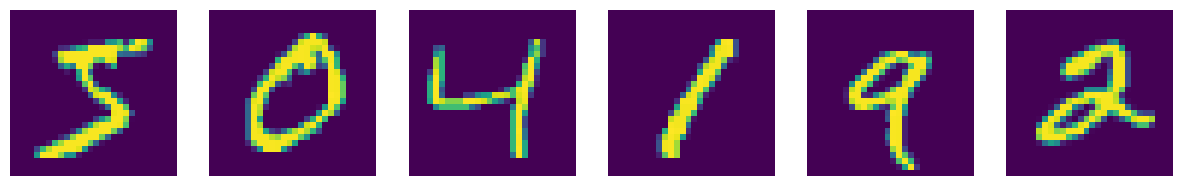

In [3]:
# Plot the first 6 images from the training set
fig, axs = plt.subplots(1, 6, figsize=(15, 3))
for i in range(6):
    axs[i].imshow(x_train[i])
    axs[i].axis('off')
plt.show()

In [4]:
x_train[1].shape   #  This shows the shape of one of the train images (length, width, channel)

(28, 28)

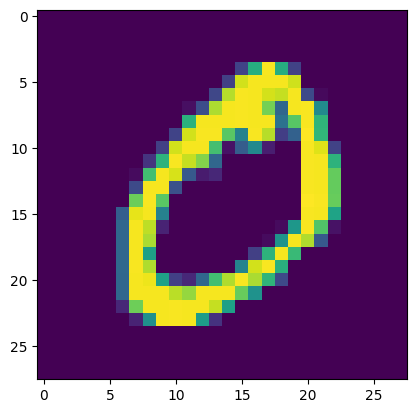

In [5]:
plt.imshow(x_train[1])

In [6]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
y_train.shape

(60000,)

In [9]:
# Reshape the input to have a single color channel.

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [10]:
# Converting the integer value to float before Normalization

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

### Step 3: Preprocess the Data

In [11]:
"""
Normalize pixel values to range 0-1.
The pixel values in an image typically range from 0 to 255.
Dividing all pixel values by 255 brings the pixel values to the range between 0 and 1.
"""

x_train = x_train / 255.0
x_test = x_test / 255.0

In [12]:
x_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [13]:
"""
For preprocessing, the ImageDataGenerator is used. 
It is used for the generation of batches of augmented image data.
In real-time during the training process.
"""

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
# Define data augmentation parameters for training set

train_datagenerator = ImageDataGenerator(
    rotation_range=20,  # Randomly rotate images up to 20 degrees
    width_shift_range=0.1,  # Randomly shift images horizontally up to 10% of the width
    height_shift_range=0.1,  # Randomly shift images vertically up to 10% of the height
    horizontal_flip=True,  # Randomly flip images horizontally
    vertical_flip=False,  # Don't randomly flip images vertically
    shear_range=0.10, # crops part of the image
    zoom_range=0.10 # #zooms the image by 10%
)

In [15]:
# Fit the transformation to the training dataset
train_datagenerator.fit(x_train)

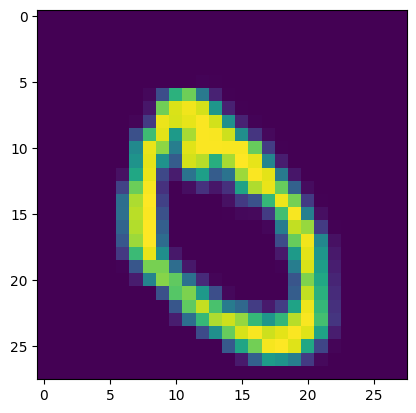

In [16]:
# showing sample of a transformation
plt.imshow(train_datagenerator.random_transform(x_train[1]))

### Step 4. Build the model (Constructor stage)

In [17]:
"""
Define the CNN architecture

Conv2D(filters=32,kernel_size=(3, 3) means use 32 filters (also called kernels) of size 3x3.

Input_shape=(28, 28, 1) means the input data is a 3D tensor with dimensions 28x28x1.(height x width x number_of_channels)
    The first dimension of the tensor (28) is the height of the image.
    The second dimension of the tensor (28) is the width of the image.
    The third dimension of the tensor (1) is the number of channels in the image (Black, White colors of the image).

The MaxPooling2D(2, 2) performs a pooling operation where the (2,2) argument indicates the size of the pooling window.
    It reduces the spatial size of the feature maps and prevent overfitting
    The output of the convolutional and pooling layers is a 3D tensor;

The Flatten() layer takes 3D tensor (height, width, channels) and reshapes it into a 1D array;
    The output of the convolutional and pooling layers is a 3D tensor;
    1D array is required by the fully connected (dense) layers; 
    Flatten() later enables the transition from the convolutional and pooling layers to the fully connected layers;
"""

mnist_model = Sequential()
mnist_model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu',padding = 'same'))
mnist_model.add(MaxPooling2D(pool_size=(2,2)))
mnist_model.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
mnist_model.add(MaxPooling2D(pool_size=(2,2)))
mnist_model.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
mnist_model.add(MaxPooling2D(pool_size=(2,2)))
mnist_model.add(Flatten())
mnist_model.add(Dense(128,activation = 'relu'))
mnist_model.add(Dropout(0.5))
mnist_model.add(Dense(10,activation = 'softmax'))

In [18]:
# print the summary of the model constructed
mnist_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

### Step 5: Compile the model (Compilation stage)

In [19]:
"""
Compile the model with categorical cross-entropy loss and SGD optimizer


categorical_crossentropy - loss function during model training
accuracy - Evaluation measure
SGD - Stochastic Gradient Descent

learning_rate=0.001 specifies the step size of the updates to the weights during training. 
momentum=0.9 is a parameter that helps the optimizer to accelerate in the direction of the gradient and dampen oscillations.
Higher values of momentum allow the optimizer to move more smoothly towards the global minimum 
And reduce the chance of getting stuck in local minima.
"""
mnist_model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

### Step 6: Training and evaluation of the model (Training stage)

In [20]:
""" 
Train the model with 20 epochs and batch size of 32.
to_categorical() method converts integer class labels into one-hot encoded vectors;
Also used to convert predicted scores back into class labels for evaluation in classification problems.

batch_size=32: the training dataset is put into mini-batches of size 32.

epochs=25: The model will be trained for 20 epochs; 
This means the dataset will be passed through the model 20 times for training.
"""

history=mnist_model.fit(train_datagenerator.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),
         epochs=20, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/20
1875/1875 [==============================] - 20s 10ms/step - loss: 1.6219 - accuracy: 0.4310 - val_loss: 0.4909 - val_accuracy: 0.8206
Epoch 2/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.7211 - accuracy: 0.7592 - val_loss: 0.2725 - val_accuracy: 0.9152
Epoch 3/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.5301 - accuracy: 0.8285 - val_loss: 0.1781 - val_accuracy: 0.9457
Epoch 4/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.4262 - accuracy: 0.8664 - val_loss: 0.1335 - val_accuracy: 0.9550
Epoch 5/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3659 - accuracy: 0.8846 - val_loss: 0.1103 - val_accuracy: 0.9620
Epoch 6/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3174 - accuracy: 0.9017 - val_loss: 0.0942 - val_accuracy: 0.9671
Epoch 7/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2872 - accuracy: 0.9118 - val_loss: 0.0852 -

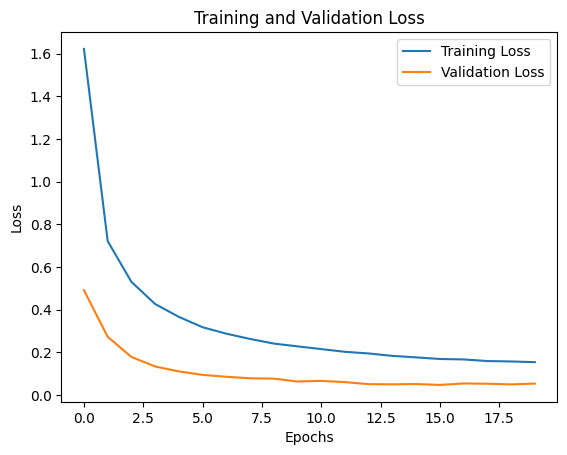

In [21]:
# Checking for overfitting.

# Plot training loss against validation loss.

#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')

#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')

#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')

#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')

#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')

#Shows the legend of the plot with the labels of the two lines.
plt.legend()

#Shows the plot on the screen.
plt.show()

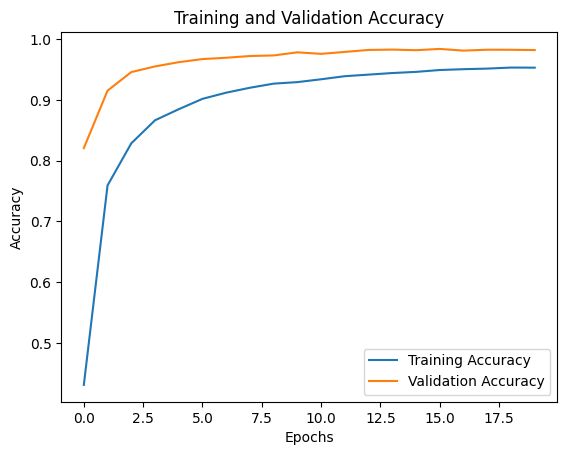

In [22]:
# Plot training and validation accuracy

#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history.history['accuracy'], label='Training Accuracy')

#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')

#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')

#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')

#Shows the legend of the plot with the labels of the two lines.
plt.legend()

#Shows the plot on the screen.
plt.show()

In [23]:
"""
Predict the classes of the test set

np.argmax(model.predict(x_test), axis=-1), 
This means that the argmax operation will be applied to the output predictions of the model along the last dimension;
This is the class probabilities for each test instance.
argmax returns the class with the largest predicted probability.
"""

y_pred = np.argmax(mnist_model.predict(x_test), axis=-1)

313/313 [==============================] - 1s 4ms/step


### Step 8: Visualise the results

In [24]:
classification_report_mnist = classification_report(y_test, y_pred,output_dict=True)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.97      0.96      0.96      1032
           3       1.00      0.98      0.99      1010
           4       0.97      1.00      0.98       982
           5       0.96      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [25]:
mnist_df = pd.DataFrame(classification_report_mnist).transpose()
mnist_df

,precision,recall,f1-score,support
0,0.991878,0.996939,0.994402,980.0000
1,0.996479,0.997357,0.996918,1135.0000
2,0.968658,0.958333,0.963468,1032.0000
3,0.995980,0.981188,0.988529,1010.0000
4,0.965551,0.998982,0.981982,982.0000
5,0.963211,0.968610,0.965903,892.0000
6,0.978079,0.978079,0.978079,958.0000
7,0.982405,0.977626,0.980010,1028.0000
8,0.984694,0.990760,0.987718,974.0000
9,0.988878,0.969277,0.978979,1009.0000


# Question A 

- How did the use of different regularisation methods affect the performance of your CNN model?

- The following Some regularization methods were used to improve the generalisation of our model on unseen data:
    - Dropout
    - Early Stopping
    - L1 and L2
    - Data Augmentation
    - Batch Normaliztion

### Regularisation Method - Early Stopping

In [26]:
mnist_model_2 = Sequential()
mnist_model_2.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu',padding = 'same'))
mnist_model_2.add(MaxPooling2D(pool_size=(2,2)))
mnist_model_2.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
mnist_model_2.add(MaxPooling2D(pool_size=(2,2)))
mnist_model_2.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
mnist_model_2.add(MaxPooling2D(pool_size=(2,2)))
mnist_model_2.add(Flatten())
mnist_model_2.add(Dense(128,activation = 'relu'))
mnist_model_2.add(Dropout(0.5))
mnist_model_2.add(Dense(10,activation = 'softmax'))
#compiling the model
mnist_model_2.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', 
                      metrics=['accuracy'])

In [27]:
# Training the model.

earlystopping = callbacks.EarlyStopping(monitor="val_loss",mode="min", patience=5,restore_best_weights=True,verbose=1)
 
history_2=mnist_model_2.fit(train_datagenerator.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),
          epochs=25, validation_data=(x_test, keras.utils.to_categorical(y_test)),callbacks=[earlystopping])

Epoch 1/25
1875/1875 [==============================] - 20s 11ms/step - loss: 1.4854 - accuracy: 0.4879 - val_loss: 0.4294 - val_accuracy: 0.8572
Epoch 2/25
1875/1875 [==============================] - 20s 11ms/step - loss: 0.6991 - accuracy: 0.7662 - val_loss: 0.2654 - val_accuracy: 0.9143
Epoch 3/25
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5254 - accuracy: 0.8311 - val_loss: 0.1806 - val_accuracy: 0.9424
Epoch 4/25
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4255 - accuracy: 0.8650 - val_loss: 0.1291 - val_accuracy: 0.9615
Epoch 5/25
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3584 - accuracy: 0.8870 - val_loss: 0.1122 - val_accuracy: 0.9628
Epoch 6/25
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3161 - accuracy: 0.9014 - val_loss: 0.0934 - val_accuracy: 0.9692
Epoch 7/25
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2912 - accuracy: 0.9108 - val_loss: 0.0802 -

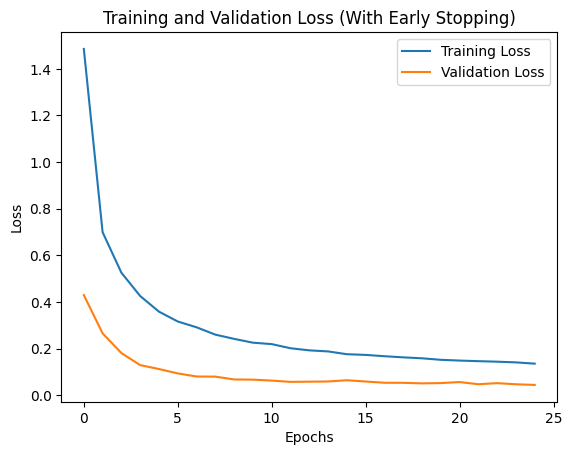

In [28]:
# Checking for overfitting

# Plot training loss against validation loss

#Plots the training loss as a line with label "Training Loss".
plt.plot(history_2.history['loss'], label='Training Loss')

#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history_2.history['val_loss'], label='Validation Loss')

#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss (With Early Stopping)')

#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')

#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')

#Shows the legend of the plot with the labels of the two lines.
plt.legend()

#Shows the plot on the screen.
plt.show()

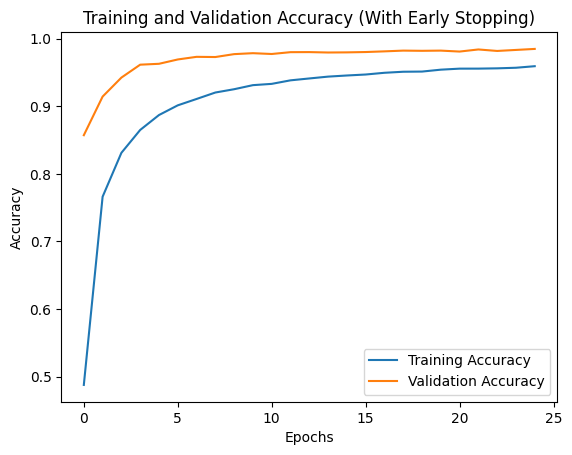

In [29]:
# Plot training and validation accuracy

#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history_2.history['accuracy'], label='Training Accuracy')

#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')

#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy (With Early Stopping)')

#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')

#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')

#Shows the legend of the plot with the labels of the two lines.
plt.legend()

#Shows the plot on the screen.
plt.show()

In [30]:
#make predictions
y_pred_2 = np.argmax(mnist_model_2.predict(x_test), axis=-1)

313/313 [==============================] - 1s 3ms/step


In [31]:
#Visualize the result

classification_report2_mnist = classification_report(y_test, y_pred_2,output_dict=True)

print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      0.99      1.00      1135
           2       0.97      0.96      0.97      1032
           3       1.00      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.97      0.97      0.97       892
           6       0.96      0.99      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [32]:
mnist_df_2 = pd.DataFrame(classification_report2_mnist).transpose()
mnist_df_2

,precision,recall,f1-score,support
0,0.996936,0.995918,0.996427,980.0000
1,0.995591,0.994714,0.995152,1135.0000
2,0.973399,0.957364,0.965315,1032.0000
3,0.995025,0.990099,0.992556,1010.0000
4,0.984787,0.988798,0.986789,982.0000
5,0.972004,0.973094,0.972549,892.0000
6,0.964431,0.990605,0.977343,958.0000
7,0.988201,0.977626,0.982885,1028.0000
8,0.992798,0.990760,0.991778,974.0000
9,0.982266,0.988107,0.985178,1009.0000


### Observations
- The model had it's least validation loss of 0.0441 at the 25th epoch, hence, this epoch value will be kept constant.
- The training completed up to the 25th epoch with early stopping in-place, meaning the model did not overfit up to 
  the 25th epoch .

### Regularisation Method - Batch Normaliztion

We would examine the introduction of Batch Normalization into our model because it normalizes the matrix after it has been through a convolution layer. It reduces training time and ensures that the scale of each dimension remains the same.

In [33]:
mnist_model_3 = Sequential()
mnist_model_3.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu',padding = 'same'))
mnist_model_3.add(MaxPooling2D(pool_size=(2,2)))
mnist_model_3.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
mnist_model_3.add(MaxPooling2D(pool_size=(2,2)))
mnist_model_3.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
mnist_model_3.add(MaxPooling2D(pool_size=(2,2)))
mnist_model_3.add(Flatten())
mnist_model_3.add(BatchNormalization())
mnist_model_3.add(Dense(128,activation = 'relu'))
mnist_model_3.add(Dropout(0.5))
mnist_model_3.add(Dense(10,activation = 'softmax'))
#compiling the model
mnist_model_3.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', 
                      metrics=['accuracy'])

In [34]:
#Training and evaluating the model

history_3=mnist_model_3.fit(train_datagenerator.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),
         epochs=25, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/25
1875/1875 [==============================] - 21s 11ms/step - loss: 0.7626 - accuracy: 0.7484 - val_loss: 0.2496 - val_accuracy: 0.9229
Epoch 2/25
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3704 - accuracy: 0.8839 - val_loss: 0.2137 - val_accuracy: 0.9339
Epoch 3/25
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2839 - accuracy: 0.9122 - val_loss: 0.1081 - val_accuracy: 0.9664
Epoch 4/25
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2443 - accuracy: 0.9242 - val_loss: 0.0686 - val_accuracy: 0.9783
Epoch 5/25
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2137 - accuracy: 0.9337 - val_loss: 0.0777 - val_accuracy: 0.9755
Epoch 6/25
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1933 - accuracy: 0.9408 - val_loss: 0.1093 - val_accuracy: 0.9659
Epoch 7/25
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1845 - accuracy: 0.9440 - val_loss: 0.0764 -

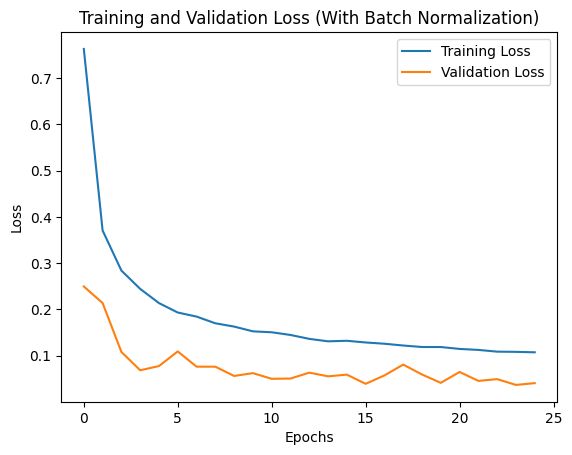

In [35]:
# Checking for overfitting

# Plot training loss against validation loss

#Plots the training loss as a line with label "Training Loss".
plt.plot(history_3.history['loss'], label='Training Loss')

#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history_3.history['val_loss'], label='Validation Loss')

#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss (With Batch Normalization)')

#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')

#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')

#Shows the legend of the plot with the labels of the two lines.
plt.legend()

#Shows the plot on the screen.
plt.show()

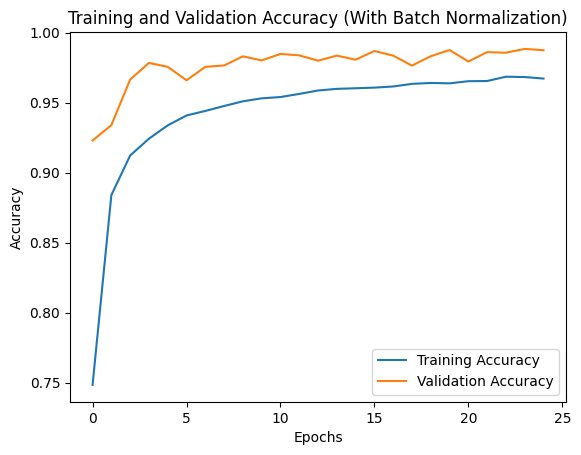

In [36]:
# Plot training and validation accuracy

#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history_3.history['accuracy'], label='Training Accuracy')

#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history_3.history['val_accuracy'], label='Validation Accuracy')

#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy (With Batch Normalization)')

#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')

#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')

#Shows the legend of the plot with the labels of the two lines.
plt.legend()

#Shows the plot on the screen.
plt.show()

In [37]:
# Makings predictions
y_pred_3 = np.argmax(mnist_model_3.predict(x_test), axis=-1)

313/313 [==============================] - 1s 4ms/step


In [38]:
# Visualising the result

classification_report3_mnist = classification_report(y_test, y_pred_3,output_dict=True)

print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.97      0.98      0.98      1032
           3       0.99      1.00      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.98      0.97      0.97       892
           6       0.99      0.97      0.98       958
           7       0.98      1.00      0.99      1028
           8       1.00      0.98      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [39]:
mnist_df_3 = pd.DataFrame(classification_report3_mnist).transpose()
mnist_df_3

,precision,recall,f1-score,support
0,0.992857,0.992857,0.992857,980.0000
1,0.998229,0.992952,0.995583,1135.0000
2,0.970363,0.983527,0.976901,1032.0000
3,0.991150,0.998020,0.994573,1010.0000
4,0.983936,0.997963,0.990900,982.0000
5,0.975309,0.974215,0.974762,892.0000
6,0.989407,0.974948,0.982124,958.0000
7,0.979904,0.996109,0.987940,1028.0000
8,0.995833,0.981520,0.988625,974.0000
9,0.995968,0.979187,0.987506,1009.0000


### Observations

- By using the Batch Normalization, the model's accuracy increased by 0.26% while the validation loss reduced by 16%.

### Investigating the performance of the model with different optimizers.

- The following parameters will be kept constant : Learning_rate, Batch_size and Epochs

In [40]:
mnist_model_4 = Sequential()
mnist_model_4.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu',padding = 'same'))
mnist_model_4.add(MaxPooling2D(pool_size=(2,2)))
mnist_model_4.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
mnist_model_4.add(MaxPooling2D(pool_size=(2,2)))
mnist_model_4.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
mnist_model_4.add(MaxPooling2D(pool_size=(2,2)))
mnist_model_4.add(Flatten())
mnist_model_4.add(BatchNormalization())
mnist_model_4.add(Dense(128,activation = 'relu'))
mnist_model_4.add(Dropout(0.5))
mnist_model_4.add(Dense(10,activation = 'softmax'))
#compiling the model
mnist_model_4.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
#Training and evaluating the model
history_4=mnist_model_4.fit(train_datagenerator.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),
         epochs=25, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/25
1875/1875 [==============================] - 20s 11ms/step - loss: 0.4311 - accuracy: 0.8633 - val_loss: 0.1218 - val_accuracy: 0.9654
Epoch 2/25
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2178 - accuracy: 0.9344 - val_loss: 0.1182 - val_accuracy: 0.9652
Epoch 3/25
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1861 - accuracy: 0.9436 - val_loss: 0.0746 - val_accuracy: 0.9801
Epoch 4/25
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1620 - accuracy: 0.9520 - val_loss: 0.0623 - val_accuracy: 0.9814
Epoch 5/25
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1527 - accuracy: 0.9543 - val_loss: 0.0695 - val_accuracy: 0.9799
Epoch 6/25
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1448 - accuracy: 0.9565 - val_loss: 0.0805 - val_accuracy: 0.9774
Epoch 7/25
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1420 - accuracy: 0.9590 - val_loss: 0.0759 -

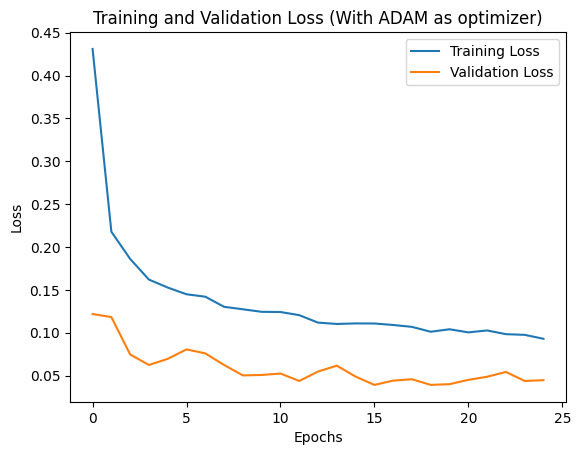

In [42]:
# Checking for overfitting

# Plot training loss against validation loss

# Plots the training loss as a line with label "Training Loss".
plt.plot(history_4.history['loss'], label='Training Loss')

#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history_4.history['val_loss'], label='Validation Loss')

#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss (With ADAM as optimizer)')

#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')

#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')

#Shows the legend of the plot with the labels of the two lines.
plt.legend()

#Shows the plot on the screen.
plt.show()

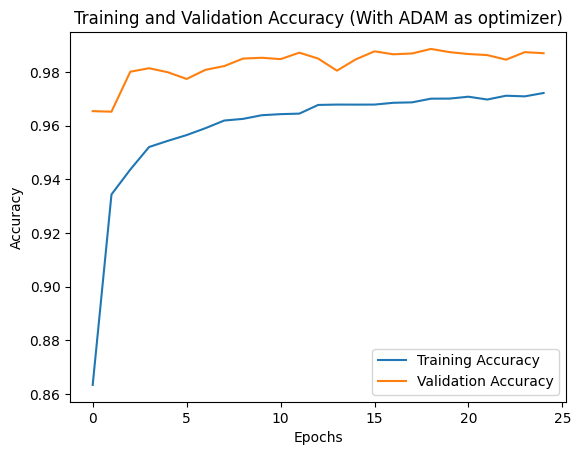

In [43]:
# Plot training and validation accuracy

#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history_4.history['accuracy'], label='Training Accuracy')

#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history_4.history['val_accuracy'], label='Validation Accuracy')

#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy (With ADAM as optimizer)')

#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')

#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')

#Shows the legend of the plot with the labels of the two lines.
plt.legend()

#Shows the plot on the screen.
plt.show()

In [44]:
# Making predictions
y_pred_4 = np.argmax(mnist_model_4.predict(x_test), axis=-1)

313/313 [==============================] - 1s 4ms/step


In [45]:
# Visualising the result

classification_report4_mnist = classification_report(y_test, y_pred_4,output_dict=True)

print(classification_report(y_test, y_pred_4))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.97      0.97      0.97      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.97      0.99       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       1.00      0.99      0.99      1028
           8       0.99      1.00      0.99       974
           9       0.97      1.00      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [46]:
mnist_df_4 = pd.DataFrame(classification_report4_mnist).transpose()
mnist_df_4

,precision,recall,f1-score,support
0,0.993884,0.994898,0.994391,980.000
1,0.997352,0.995595,0.996473,1135.000
2,0.972789,0.969961,0.971373,1032.000
3,0.993083,0.995050,0.994065,1010.000
4,0.997910,0.972505,0.985044,982.000
5,0.976562,0.980942,0.978747,892.000
6,0.977083,0.979123,0.978102,958.000
7,0.996067,0.985409,0.990709,1028.000
8,0.989817,0.997947,0.993865,974.000
9,0.973863,0.997027,0.985309,1009.000


## Observations

- The model's accuracy decreased by 0.40% using Adam as the Optimizer while the validation loss increased by 5.7% with 0.0391 being the least validation loss for the Adam optimizer as against 0.0370 for the SGD optimizer.
- SGD optimizer performed better than Adam optimizer.

In [47]:
# Using RMSProp as Optimizer.

mnist_model_5 = Sequential()
mnist_model_5.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu',padding = 'same'))
mnist_model_5.add(MaxPooling2D(pool_size=(2,2)))
mnist_model_5.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
mnist_model_5.add(MaxPooling2D(pool_size=(2,2)))
mnist_model_5.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
mnist_model_5.add(MaxPooling2D(pool_size=(2,2)))
mnist_model_5.add(Flatten())
mnist_model_5.add(BatchNormalization())
mnist_model_5.add(Dense(128,activation = 'relu'))
mnist_model_5.add(Dropout(0.5))
mnist_model_5.add(Dense(10,activation = 'softmax'))
#compiling the model
mnist_model_5.compile(optimizer=RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
# Training and evaluating the model
history_5=mnist_model_5.fit(train_datagenerator.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),
         epochs=25, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/25
1875/1875 [==============================] - 22s 11ms/step - loss: 0.4372 - accuracy: 0.8637 - val_loss: 0.2170 - val_accuracy: 0.9496
Epoch 2/25
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2533 - accuracy: 0.9283 - val_loss: 0.1758 - val_accuracy: 0.9647
Epoch 3/25
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2382 - accuracy: 0.9348 - val_loss: 0.2022 - val_accuracy: 0.9687
Epoch 4/25
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2382 - accuracy: 0.9382 - val_loss: 0.1227 - val_accuracy: 0.9797
Epoch 5/25
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2399 - accuracy: 0.9394 - val_loss: 0.2612 - val_accuracy: 0.9631
Epoch 6/25
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2386 - accuracy: 0.9403 - val_loss: 0.1602 - val_accuracy: 0.9728
Epoch 7/25
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2382 - accuracy: 0.9422 - val_loss: 0.1620 -

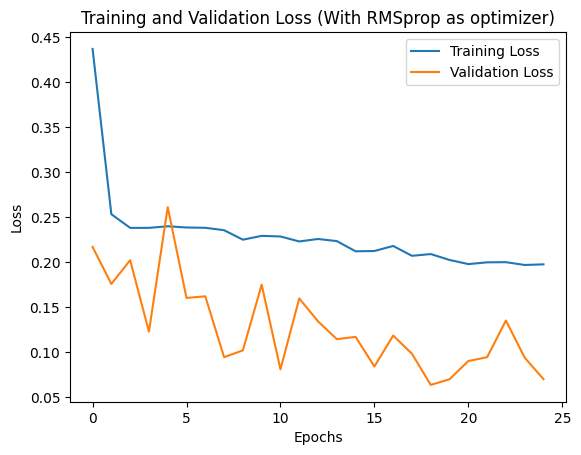

In [49]:
# Checking for overfitting

# Plot training loss against validation loss

#Plots the training loss as a line with label "Training Loss".
plt.plot(history_5.history['loss'], label='Training Loss')

#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history_5.history['val_loss'], label='Validation Loss')

#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss (With RMSprop as optimizer)')

#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')

#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')

#Shows the legend of the plot with the labels of the two lines.
plt.legend()

#Shows the plot on the screen.
plt.show()

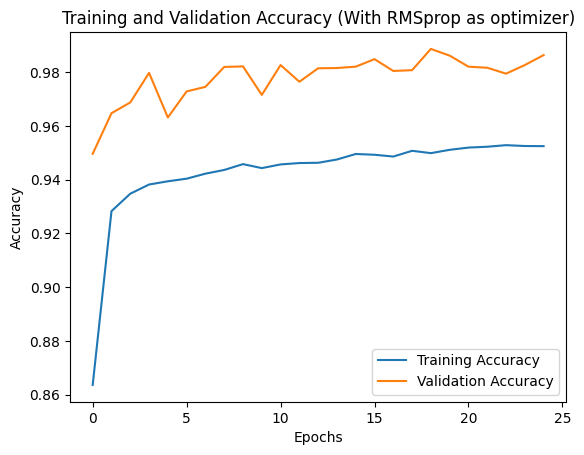

In [50]:
# Plot training and validation accuracy

#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history_5.history['accuracy'], label='Training Accuracy')

#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history_5.history['val_accuracy'], label='Validation Accuracy')

#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy (With RMSprop as optimizer)')

#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')

#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')

#Shows the legend of the plot with the labels of the two lines.
plt.legend()

#Shows the plot on the screen.
plt.show()

In [51]:
# Making predictions
y_pred_5 = np.argmax(mnist_model_5.predict(x_test), axis=-1)

313/313 [==============================] - 1s 3ms/step


In [52]:
#Visualize the result

classification_report5_mnist = classification_report(y_test, y_pred_5,output_dict=True)

print(classification_report(y_test, y_pred_5))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.98      1.00      0.99      1010
           4       0.97      1.00      0.99       982
           5       0.98      0.98      0.98       892
           6       0.98      0.99      0.98       958
           7       0.99      0.98      0.99      1028
           8       0.99      1.00      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [53]:
mnist_df_5 = pd.DataFrame(classification_report5_mnist).transpose()
mnist_df_5

,precision,recall,f1-score,support
0,0.997947,0.991837,0.994882,980.0000
1,0.994686,0.989427,0.992049,1135.0000
2,0.985192,0.967054,0.976039,1032.0000
3,0.978682,1.000000,0.989226,1010.0000
4,0.974155,0.997963,0.985915,982.0000
5,0.977528,0.975336,0.976431,892.0000
6,0.975283,0.988518,0.981856,958.0000
7,0.991159,0.981518,0.986315,1028.0000
8,0.992835,0.995893,0.994362,974.0000
9,0.993939,0.975223,0.984492,1009.0000


## Observations

- The model's accuracy decreased by 0.11% using RMSprop as the Optimizer while the validation loss increased by 71.35% with 0.0634 being the least validation loss for the RMSprop optimizer as against 0.0370 for the SGD optimizer


- There were instances of overfitting at the 5th Epoch using RMSprop as the optimizer.


- SGD optimizer performed better than RMSprop

# Question B

- Report how changes to the number of convolution blocks affect the performance ofyour model quantitatively?

In [54]:
#Increaing the convolution blocks from 3 to 4 with epochs,learning rate, batchsize, optimizer kept constant
mnist_model_6 = Sequential()
mnist_model_6.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu',padding = 'same'))
mnist_model_6.add(MaxPooling2D(pool_size=(2,2)))
mnist_model_6.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
mnist_model_6.add(MaxPooling2D(pool_size=(2,2)))
mnist_model_6.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
mnist_model_6.add(MaxPooling2D(pool_size=(2,2)))
mnist_model_6.add(ZeroPadding2D(padding=((1, 1), (1, 1)))) # Add padding layer to resolve Negative dimension size error
mnist_model_6.add(Conv2D(filters=256,kernel_size=(3,3),activation = 'relu'))
mnist_model_6.add(MaxPooling2D(pool_size=(2,2)))
mnist_model_6.add(Flatten())
mnist_model_6.add(BatchNormalization())
mnist_model_6.add(Dense(128,activation = 'relu'))
mnist_model_6.add(Dropout(0.5))
mnist_model_6.add(Dense(10,activation = 'softmax'))
#compiling the model
mnist_model_6.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', 
                      metrics=['accuracy'])

In [55]:
#Training and evaluating the model
history_6=mnist_model_6.fit(train_datagenerator.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),
         epochs=25, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/25
1875/1875 [==============================] - 24s 13ms/step - loss: 0.6686 - accuracy: 0.7791 - val_loss: 0.2134 - val_accuracy: 0.9278
Epoch 2/25
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2989 - accuracy: 0.9087 - val_loss: 0.1063 - val_accuracy: 0.9650
Epoch 3/25
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2215 - accuracy: 0.9322 - val_loss: 0.0919 - val_accuracy: 0.9702
Epoch 4/25
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1868 - accuracy: 0.9442 - val_loss: 0.0934 - val_accuracy: 0.9708
Epoch 5/25
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1634 - accuracy: 0.9499 - val_loss: 0.0657 - val_accuracy: 0.9808
Epoch 6/25
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1471 - accuracy: 0.9557 - val_loss: 0.0759 - val_accuracy: 0.9759
Epoch 7/25
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1378 - accuracy: 0.9584 - val_loss: 0.0858 -

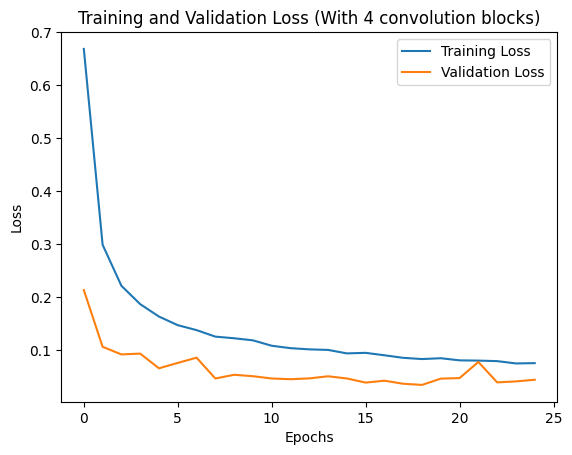

In [56]:
# Checking for overfitting

# Plot training loss against validation loss

#Plots the training loss as a line with label "Training Loss".
plt.plot(history_6.history['loss'], label='Training Loss')

#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history_6.history['val_loss'], label='Validation Loss')

#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss (With 4 convolution blocks)')

#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')

#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')

#Shows the legend of the plot with the labels of the two lines.
plt.legend()

#Shows the plot on the screen.
plt.show()

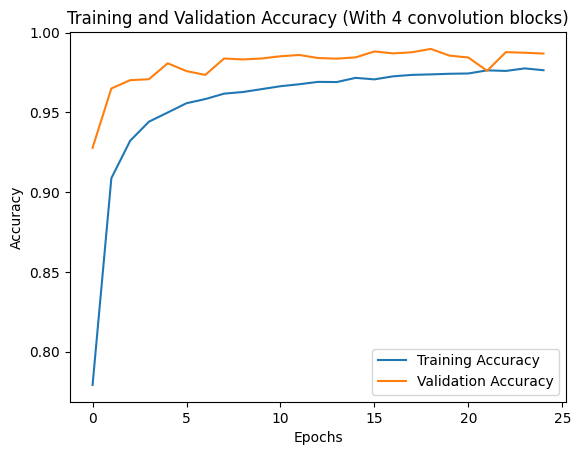

In [57]:
# Plot training and validation accuracy

# Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history_6.history['accuracy'], label='Training Accuracy')

# Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history_6.history['val_accuracy'], label='Validation Accuracy')

# Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy (With 4 convolution blocks)')

# Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')

# Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')

# Shows the legend of the plot with the labels of the two lines.
plt.legend()

# Shows the plot on the screen.
plt.show()

In [58]:
# Making predictions
y_pred_6 = np.argmax(mnist_model_6.predict(x_test), axis=-1)

313/313 [==============================] - 1s 4ms/step


In [59]:
#Visualize the result

classification_report6_mnist = classification_report(y_test, y_pred_6,output_dict=True)

print(classification_report(y_test, y_pred_6))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       1.00      0.98      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.98      0.97       892
           6       0.97      0.99      0.98       958
           7       0.99      0.98      0.99      1028
           8       0.98      1.00      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [61]:
mnist_df_6 = pd.DataFrame(classification_report6_mnist).transpose()
mnist_df_6

,precision,recall,f1-score,support
0,0.996907,0.986735,0.991795,980.0000
1,0.999106,0.984141,0.991567,1135.0000
2,0.973888,0.975775,0.974831,1032.0000
3,0.993062,0.992079,0.992571,1010.0000
4,0.992879,0.993890,0.993384,982.0000
5,0.967778,0.976457,0.972098,892.0000
6,0.974359,0.991649,0.982928,958.0000
7,0.993124,0.983463,0.988270,1028.0000
8,0.980827,0.997947,0.989313,974.0000
9,0.994012,0.987116,0.990552,1009.0000


## Observations

- The model's accuracy decreased by 0.05% with an increase in the number of convolution blocks and the validation loss decreased by 7.30% from 0.0370 to 0.0343. However, considering the time it took to train the model and the weighted average accuracy which is higher in the model with three (3) convolution blocks, the model with 3 convolution blocks is a more optimal option.

# Question C

- What is the effect of varying learning rates on the performance of the CNN algorithm?

In [ ]:
# We would try to find the learning rate that yields the best performance on a validation set using keras 
#tuner hyperparameter tuning

In [65]:
def create_cnn_model(hpt):
    model = keras.Sequential()
    model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu',padding = 'same'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(layers.Dense(128,activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(layers.Dense(10, activation="softmax"))
    model.compile(optimizer=keras.optimizers.SGD
                  (hpt.Choice('learning_rate', [0.01,0.005,0.0025,0.00125,0.001844]),momentum=0.9),
                  loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [66]:
my_tuner = RandomSearch(
    create_cnn_model, #The function containing the built model
    objective="val_accuracy",  #The name of the objective to optimize
    max_trials=5, #The total number of trials to run during the search
    executions_per_trial=1, #The number of models that should be built and fit for each trial
    overwrite=True, #Decide whether to overwrite the previous results in the same directory or resume the previous search.
    directory="file_dir",   #A path to a directory for storing the search results
    project_name="cnn_mints_classification"   #The name of the sub-directory in the directory.
)

In [67]:
#printing a summary of the search space
my_tuner.search_space_summary()

Search space summary
Default search space size: 1
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.005, 0.0025, 0.00125, 0.001844], 'ordered': True}


In [69]:
history_7=my_tuner.search(train_datagenerator.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),
         epochs=25, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Trial 5 Complete [00h 09m 30s]
val_accuracy: 0.9872999787330627

Best val_accuracy So Far: 0.9894999861717224
Total elapsed time: 00h 47m 13s
INFO:tensorflow:Oracle triggered exit


In [70]:
my_tuner.results_summary()

Results summary
Results in file_dir\cnn_mints_classification
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
learning_rate: 0.001844
Score: 0.9894999861717224

Trial 1 summary
Hyperparameters:
learning_rate: 0.005
Score: 0.989300012588501

Trial 3 summary
Hyperparameters:
learning_rate: 0.0025
Score: 0.9890000224113464

Trial 2 summary
Hyperparameters:
learning_rate: 0.00125
Score: 0.9878000020980835

Trial 4 summary
Hyperparameters:
learning_rate: 0.01
Score: 0.9872999787330627


## Observations

- The model's accuracy would increase by 0.21% if the learning rate of 0.001844 is used.


- Varying the learning rate of a model could impact the models' performace as shown in the summary above.

# Question D

- Was there a case of overfitting observed in your model at any point ?

Yes, there was an instance of overfitting at the 5th Epoch when RMSprop was used as an optimizer.